# Dados cidades da RIDE - Janeiro de 2014

In [61]:
#imports
import pandas as pd
import csv
import matplotlib.pyplot as plt
import seaborn as sns 
from sklearn.cluster import KMeans
import warnings
import os
from collections import OrderedDict
pd.set_option("display.max_rows", 2000)
warnings.filterwarnings("ignore")

In [73]:
#Lendo o arquivo e criando um dataframe
df = pd.read_csv('/home/marcos/Desktop/dados_teste/clean_data/201401.csv', low_memory=False)
#df = df.astype('category')
df.head()

,MES_REFERENCIA,MES_COMPETENCIA,UF,CODIGO_MUNICIPIO_SIAFI,NOME_MUNICIPIO,NIS_FAVORECIDO,NOME_FAVORECIDO,VALOR_PARCELA
0,201401,201302,DF,9701,BRASILIA,16207627750,CATIA MACIEL DE ALMEIDA RIBEIRO,102
1,201401,201303,DF,9701,BRASILIA,16207627750,CATIA MACIEL DE ALMEIDA RIBEIRO,102
2,201401,201304,DF,9701,BRASILIA,16207627750,CATIA MACIEL DE ALMEIDA RIBEIRO,102
3,201401,201305,DF,9701,BRASILIA,16207627750,CATIA MACIEL DE ALMEIDA RIBEIRO,102
4,201401,201306,DF,9701,BRASILIA,16207627750,CATIA MACIEL DE ALMEIDA RIBEIRO,102


In [74]:
df.shape

(204644, 8)

In [75]:
'''Removendo colunas que não serão necessárias nesse momento lembrando que o 
MES_REFERENCIA = 201401'''

del df['VALOR_PARCELA']
del df['MES_REFERENCIA']
del df['MES_COMPETENCIA']
del df['NOME_FAVORECIDO']
df.head()

,UF,CODIGO_MUNICIPIO_SIAFI,NOME_MUNICIPIO,NIS_FAVORECIDO
0,DF,9701,BRASILIA,16207627750
1,DF,9701,BRASILIA,16207627750
2,DF,9701,BRASILIA,16207627750
3,DF,9701,BRASILIA,16207627750
4,DF,9701,BRASILIA,16207627750


In [76]:
df.shape

(204644, 4)

In [77]:
df.dtypes

UF                        object
CODIGO_MUNICIPIO_SIAFI     int64
NOME_MUNICIPIO            object
NIS_FAVORECIDO             int64
dtype: object

In [81]:
#verificação de campos nulos
df.isnull().sum()

UF                        0
CODIGO_MUNICIPIO_SIAFI    0
NOME_MUNICIPIO            0
NIS_FAVORECIDO            0
dtype: int64

## Visualização dos dados

In [92]:
plt.style.use('fivethirtyeight')

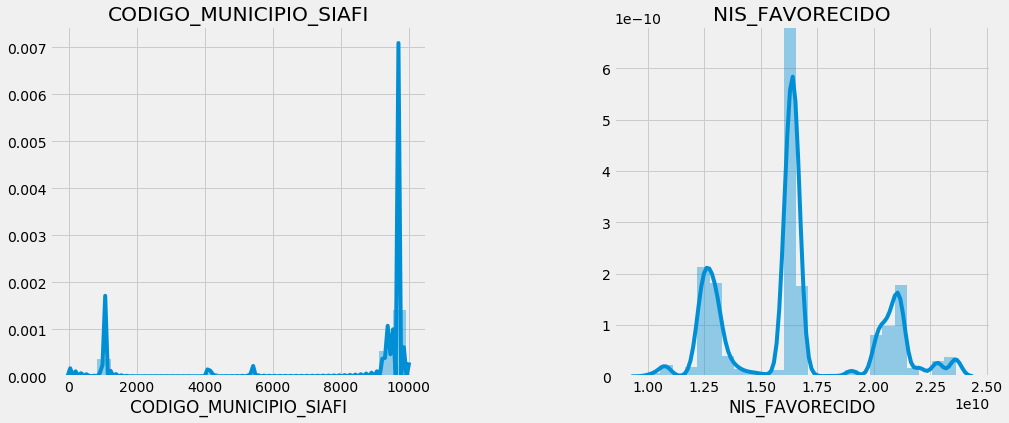

In [93]:
# Verificando as distribuição dos dados:
plt.figure(1 , figsize = (15 , 6))
n = 0 
for x in ['CODIGO_MUNICIPIO_SIAFI' , 'NIS_FAVORECIDO']:
    n += 1
    plt.subplot(1 , 2 , n)
    plt.subplots_adjust(hspace =0.5 , wspace = 0.5)
    sns.distplot(df[x] , bins = 25)
    #plt.title('{} '.format(x))
    plt.title(f'{x}')
plt.show()

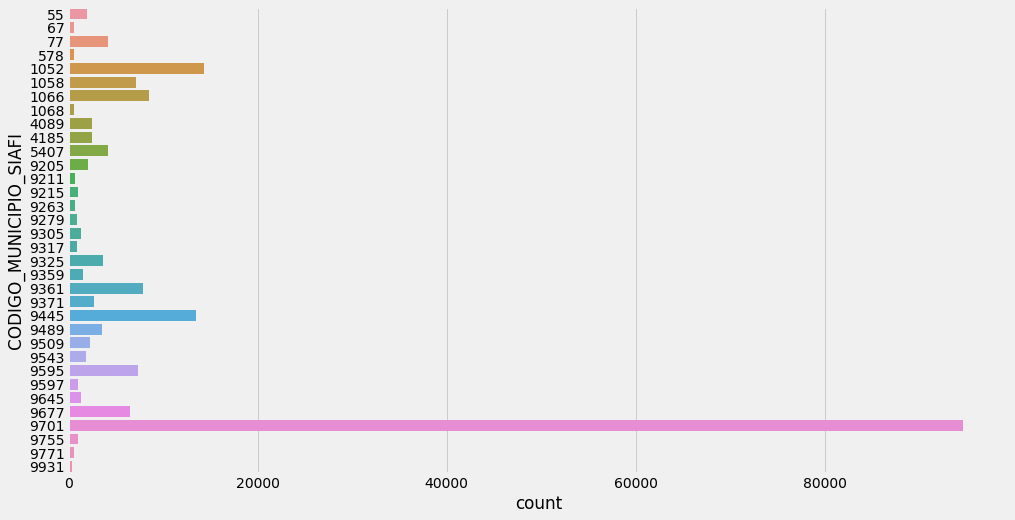

In [95]:
# Contagem de Amostras por Cidade:
plt.figure(1 , figsize = (15 , 8))
sns.countplot(y = 'CODIGO_MUNICIPIO_SIAFI' , data = df)
plt.show()

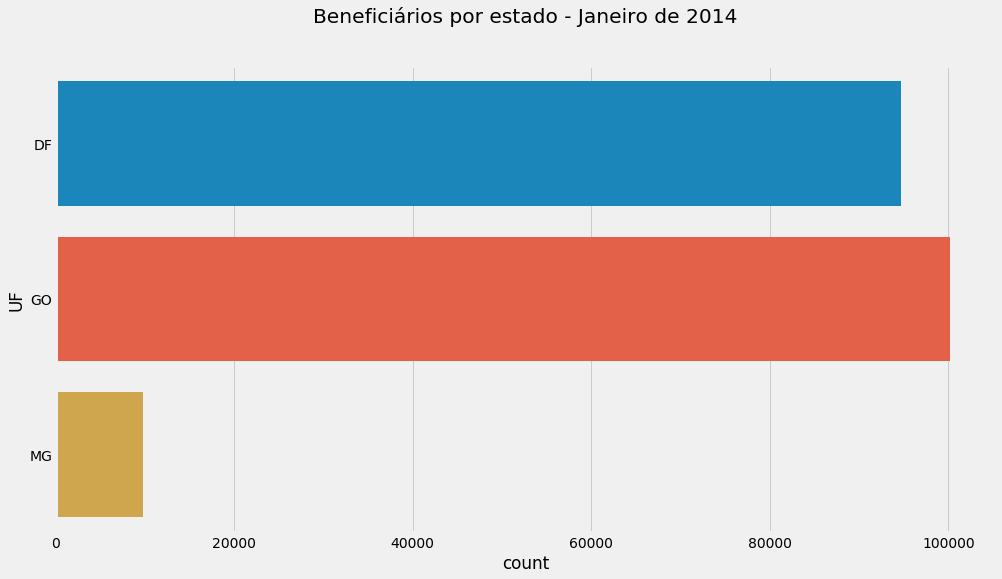

In [107]:
# Contagem de Amostras por Estado:
plt.figure(1 , figsize = (15 , 8))
sns.countplot(y = 'UF' , data = df)
plt.title('Beneficiários por estado - Janeiro de 2014', y = 1.08)
plt.show()

### Agrupando por estado (UF)

In [58]:
group = df.groupby(['UF'])
group.head(1)

,UF,CODIGO_MUNICIPIO_SIAFI,NOME_MUNICIPIO,NIS_FAVORECIDO
0,DF,9701,BRASILIA,16207627750
94648,GO,9771,AGUA FRIA DE GOIAS,16693776044
94672,MG,4185,BURITIS,12980139272


In [59]:
group2 = df.groupby(['CODIGO_MUNICIPIO_SIAFI'])
group2.head(1)

,UF,CODIGO_MUNICIPIO_SIAFI,NOME_MUNICIPIO,NIS_FAVORECIDO
0,DF,9701,BRASILIA,16207627750
94648,GO,9771,AGUA FRIA DE GOIAS,16693776044
94649,GO,1052,AGUAS LINDAS DE GOIAS,16266258472
94652,GO,9215,ALVORADA DO NORTE,16398227868
94653,GO,9263,BARRO ALTO,16541509728
94654,GO,9317,CORUMBA DE GOIAS,16675265572
94655,GO,9325,CRISTALINA,16310291492
94658,GO,9361,FORMOSA,16611246267
94659,GO,9445,LUZIANIA,12980149561
94660,GO,9489,NIQUELANDIA,21203117231


## Modelo K-means para clusterização

In [ ]:
# Selecionando o número de clusters através do método Elbow (Soma das distâncias quadráticas intra clusters):
X2 = df[['CODIGO_MUNICIPIO_SIAFI' , 'Spending Score (1-100)']].iloc[: , :].values
inertia = []
for n in range(1 , 11):
    algorithm = (KMeans(n_clusters = n))
    algorithm.fit(X2)
    inertia.append(algorithm.inertia_)